In [43]:
import numpy as np
import pandas as pd
import altair as alt

Team = pd.read_csv('Team')
Team_Attributes = pd.read_csv('Team_Attributes')
CountryLeague = pd.read_csv('CountryLeague')
Player = pd.read_csv('Player')
Player_Attributes = pd.read_csv('Player_Attributes')
Odds = pd.read_csv('Odds')
Lineup = pd.read_csv('Lineup')
GameInfo = pd.read_csv('GameInfo')

In [2]:
### Tidy Data for most recent English season recorded

In [3]:
England_GameInfo = GameInfo[GameInfo['Country'] == 'England']

In [4]:
England_1516_mod1 = England_GameInfo[England_GameInfo['season'] == '2015/2016'].drop(columns = ['id','season'])
England_1516_mod1

,League,Country,stage,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
4388,England Premier League,England,1,2015-08-09 00:00:00,9825,8654,0,2
4389,England Premier League,England,1,2015-08-08 00:00:00,8678,10252,0,1
4390,England Premier League,England,1,2015-08-08 00:00:00,8455,10003,2,2
4391,England Premier League,England,1,2015-08-08 00:00:00,8668,9817,2,2
4392,England Premier League,England,1,2015-08-08 00:00:00,8197,8472,4,2
...,...,...,...,...,...,...,...,...
4763,England Premier League,England,9,2015-10-17 00:00:00,8466,8197,2,2
4764,England Premier League,England,9,2015-10-19 00:00:00,10003,10194,0,1
4765,England Premier League,England,9,2015-10-17 00:00:00,8586,8650,0,0
4766,England Premier League,England,9,2015-10-17 00:00:00,9817,9825,0,3


In [5]:
Team_names = Team.drop(columns = ['id','team_fifa_api_id','team_short_name'])

In [6]:
## add home and away team names
England_1516_mod2 = pd.merge(
    England_1516_mod1, 
    Team_names,
    how = 'left',
    left_on = 'home_team_api_id',
    right_on = 'team_api_id')

England_1516_mod2 = England_1516_mod2.rename(
    columns = {'team_long_name':'home_team'}).drop(
    columns = ['home_team_api_id','team_api_id'])

England_1516_mod3 = pd.merge(
    England_1516_mod2,
    Team_names,
    how = 'left',
    left_on = 'away_team_api_id',
    right_on = 'team_api_id')
England_1516_mod3 = England_1516_mod3.rename(
    columns = {'team_long_name':'away_team'}).drop(
    columns = ['away_team_api_id','team_api_id'])

In [7]:
## add indicator columns for winning team and points 

England_1516_mod4 = England_1516_mod3
England_1516_mod4['h-a'] = England_1516_mod4['home_team_goal']-England_1516_mod4['away_team_goal']
England_1516_mod4['winner'] = ''
England_1516_mod4['home_points'] = ''
England_1516_mod4['away_points'] = ''
for i in range(len(England_1516_mod4)):
    if England_1516_mod4.loc[i,'h-a'] > 0:
        England_1516_mod4.loc[i,'winner'] = England_1516_mod4.loc[i,'home_team']
        England_1516_mod4.loc[i,'home_points'] = 3
        England_1516_mod4.loc[i,'away_points'] = 0
    if England_1516_mod4.loc[i,'h-a'] < 0:
        England_1516_mod4.loc[i,'winner'] = England_1516_mod4.loc[i,'away_team']
        England_1516_mod4.loc[i,'home_points'] = 0
        England_1516_mod4.loc[i,'away_points'] = 3
    if England_1516_mod4.loc[i,'h-a'] == 0:
        England_1516_mod4.loc[i,'winner'] = 'Draw'
        England_1516_mod4.loc[i,'home_points'] = 1
        England_1516_mod4.loc[i,'away_points'] = 1
England_1516_mod4['home_points'] = pd.to_numeric(England_1516_mod4['home_points'])
England_1516_mod4['away_points'] = pd.to_numeric(England_1516_mod4['away_points'])

England_1516 = England_1516_mod4.sort_values('stage').reset_index(
        ).drop(columns = ['h-a','date','League','Country','index'])


In [8]:
## tidy game by game data for England 2015-2016 season
England_1516

,stage,home_team_goal,away_team_goal,home_team,away_team,winner,home_points,away_points
0,1,0,2,Arsenal,West Ham United,West Ham United,0,3
1,1,0,1,Stoke City,Liverpool,Liverpool,0,3
2,1,1,3,Norwich City,Crystal Palace,Crystal Palace,0,3
3,1,2,2,Newcastle United,Southampton,Draw,1,1
4,1,1,0,Manchester United,Tottenham Hotspur,Manchester United,3,0
...,...,...,...,...,...,...,...,...
375,38,4,0,Arsenal,Aston Villa,Arsenal,3,0
376,38,5,1,Newcastle United,Tottenham Hotspur,Newcastle United,3,0
377,38,3,1,Manchester United,Bournemouth,Manchester United,3,0
378,38,1,1,Chelsea,Leicester City,Draw,1,1


In [9]:
### Tidy data season summary:

In [10]:
table_df = England_1516_mod4.drop(columns = ['League','Country','stage','date'])

points_tot = (table_df.groupby('away_team').sum()['away_points'] + table_df.groupby('home_team').sum()['home_points'])
goals_for = (table_df.groupby(['home_team']).sum()['home_team_goal'] + table_df.groupby(['away_team']).sum()['away_team_goal'])
goals_against = (table_df.groupby(['home_team']).sum()['away_team_goal'] + table_df.groupby(['away_team']).sum()['home_team_goal'])

In [11]:
## Construct season table
table = pd.DataFrame(points_tot).reset_index().rename(
    columns = {'away_team':'Team',0:'Points'})
table['GF'] = goals_for.values
table['GA'] = goals_against.values
table['GD'] = table['GF'] - table['GA']


table = table.sort_values('Points', ascending=False)
table['Position'] = range(1,21)
table = table.set_index('Position')

In [12]:
table

,Team,Points,GF,GA,GD
Position,,,,,
1,Leicester City,81,68,36,32
2,Arsenal,71,65,36,29
3,Tottenham Hotspur,70,69,35,34
4,Manchester United,66,49,35,14
5,Manchester City,66,71,41,30
6,Southampton,63,59,41,18
7,West Ham United,62,65,51,14
8,Liverpool,60,63,50,13
9,Stoke City,51,41,55,-14


In [13]:
### Plot of Chelsea vs Leicester throughout season

In [14]:
chelsea_1516 = England_1516_mod4.loc[ (England_1516_mod4['home_team'] == 'Chelsea') | (England_1516_mod4['away_team'] == 'Chelsea') ].reset_index()

##add cumulative points tracker
chelsea_1516['points'] = 0
for i in range(len(chelsea_1516)):
    if chelsea_1516.loc[i,'home_team'] == 'Chelsea':
        chelsea_1516.loc[i,'points'] = chelsea_1516.loc[i,'home_points']
    if chelsea_1516.loc[i,'away_team'] == 'Chelsea':
        chelsea_1516.loc[i,'points'] = chelsea_1516.loc[i,'away_points']
chelsea_1516['cum points'] = chelsea_1516['points'].cumsum()

chelsea_1516_plot = alt.Chart(chelsea_1516).mark_line().encode(
    x = 'stage',
    y = 'cum points')

In [15]:
leicester_1516 = England_1516_mod4.loc[ (England_1516_mod4['home_team'] == 'Leicester City') | (England_1516_mod4['away_team'] == 'Leicester City') ].reset_index()

##add cumulative points tracker
leicester_1516['points'] = 0
for i in range(len(chelsea_1516)):
    if leicester_1516.loc[i,'home_team'] == 'Leicester City':
        leicester_1516.loc[i,'points'] = leicester_1516.loc[i,'home_points']
    if leicester_1516.loc[i,'away_team'] == 'Leicester City':
        leicester_1516.loc[i,'points'] = leicester_1516.loc[i,'away_points']
leicester_1516['cum points'] = leicester_1516['points'].cumsum()

leicester_1516_plot = alt.Chart(leicester_1516).mark_line().encode(
    x = 'stage',
    y = 'cum points')

In [16]:
leicester_1516_plot + chelsea_1516_plot

alt.LayerChart(...)

In [17]:
##### Correlation matrix bewteen team attributes and team success in england in 2015

In [18]:
pd.set_option('display.max_columns', None)
pd.reset_option("display.max_rows")
Attributes = Team_Attributes[['team_api_id','date','buildUpPlaySpeed','chanceCreationPassing','chanceCreationCrossing',
                              'chanceCreationShooting','defencePressure','defenceAggression','defenceTeamWidth']]
Attributes.isnull().mean()
Team_Attributes['date'].unique()
Atts15 = Attributes.loc[ Attributes['date'] == '2015-09-10 00:00:00']
Atts15.head()

,team_api_id,date,buildUpPlaySpeed,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
2,9930,2015-09-10 00:00:00,47,54,63,64,47,44,54
8,8485,2015-09-10 00:00:00,59,51,72,63,49,45,63
14,8576,2015-09-10 00:00:00,59,48,38,52,38,47,53
20,8564,2015-09-10 00:00:00,48,66,36,69,58,57,49
26,10215,2015-09-10 00:00:00,53,55,51,60,39,38,61


In [19]:
efl15_corr = pd.merge(table, Team, how = 'left', left_on = 'Team', right_on = 'team_long_name')
efl15_corr = pd.merge(efl15_corr, Atts15, how = 'left', on = 'team_api_id')
efl15_corr = efl15_corr.drop(columns = ['Team','id','team_fifa_api_id','team_api_id','team_long_name','team_short_name','date'])
efl15_corr

,Points,GF,GA,GD,buildUpPlaySpeed,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,81,68,36,32,63,47,64,46,58,65,55
1,71,65,36,29,59,28,44,46,51,44,52
2,70,69,35,34,47,41,41,63,63,54,56
3,66,49,35,14,38,49,44,40,54,53,56
4,66,71,41,30,59,38,36,24,48,47,54
5,63,59,41,18,52,42,54,30,50,65,44
6,62,65,51,14,77,68,73,29,30,37,41
7,60,63,50,13,66,34,34,46,51,52,61
8,51,41,55,-14,48,51,59,49,44,37,51
9,50,59,53,6,67,41,34,44,39,41,46


In [20]:
corr_mx = efl15_corr.corr()

In [21]:
corr_mx_long = corr_mx.reset_index().melt(
    id_vars = 'index').rename(
    columns = {'index':'row','variable':'col','value':'Correlation'})

alt.Chart(corr_mx_long).mark_rect().encode(
    x = alt.X('row', sort = 'color'),
    y = alt.Y('col', sort = '-color'),
    color = alt.Color('Correlation', scale = alt.Scale(
    scheme = 'blueorange',
    domain = (-1,1)),
    legend = alt.Legend(tickCount = 5))
)

alt.Chart(...)

In [22]:
England_1516[['home_points','away_points']].sum()

home_points    578
away_points    455
dtype: int64

In [23]:
# England_1516_mod1
goal = England_1516[['home_points','away_points']]
home = alt.Chart(goal).mark_bar(size = 20).encode(
x = alt.X('home_points:Q'),
y = 'count()')

away = alt.Chart(goal).mark_bar(size = 20,color = 'green').encode(
x = alt.X('away_points:Q'),
y = 'count()')
away | home

alt.HConcatChart(...)

In [24]:
goalsum

NameError: name 'goalsum' is not defined

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

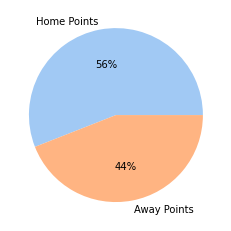

In [26]:
#define data
data = [578,455]
labels = ['Home Points', 'Away Points']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [27]:
# Focusing on player information
Player = Player[['player_api_id','player_name','height','weight']]

In [28]:
Player_Attributes = Player_Attributes[['overall_rating','player_api_id','preferred_foot','attacking_work_rate','defensive_work_rate','crossing','finishing','heading_accuracy','short_passing','dribbling','free_kick_accuracy','long_passing','ball_control','long_shots','vision']]
Player_Attributes

,overall_rating,player_api_id,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,dribbling,free_kick_accuracy,long_passing,ball_control,long_shots,vision
0,67.0,505942,right,medium,medium,49.0,44.0,71.0,61.0,51.0,39.0,64.0,49.0,35.0,54.0
1,67.0,505942,right,medium,medium,49.0,44.0,71.0,61.0,51.0,39.0,64.0,49.0,35.0,54.0
2,62.0,505942,right,medium,medium,49.0,44.0,71.0,61.0,51.0,39.0,64.0,49.0,35.0,54.0
3,61.0,505942,right,medium,medium,48.0,43.0,70.0,60.0,50.0,38.0,63.0,48.0,34.0,53.0
4,61.0,505942,right,medium,medium,48.0,43.0,70.0,60.0,50.0,38.0,63.0,48.0,34.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,83.0,39902,right,medium,low,84.0,77.0,59.0,89.0,84.0,78.0,84.0,85.0,81.0,88.0
183974,78.0,39902,right,medium,low,74.0,76.0,53.0,84.0,85.0,74.0,73.0,86.0,73.0,88.0
183975,77.0,39902,right,medium,low,74.0,71.0,53.0,84.0,85.0,74.0,73.0,86.0,73.0,88.0
183976,78.0,39902,right,medium,low,74.0,64.0,57.0,86.0,87.0,73.0,73.0,91.0,78.0,88.0


In [44]:
player_mod1 = pd.merge(Player, Player_Attributes, how = 'left', on = 'player_api_id')
player_mod1 = player_mod1.drop(columns = ['birthday','attacking_work_rate','defensive_work_rate'])
rename1 = {'player_api_id':'ID','player_name':'Name','height':'Height','weight':'Weight'}
player_mod1 = player_mod1.rename(columns = rename1)
player_mod1

,id_x,ID,Name,player_fifa_api_id_x,Height,Weight,id_y,player_fifa_api_id_y,date,overall_rating,potential,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,182.88,187,1,218353,2016-02-18 00:00:00,67.0,71.0,right,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,182.88,187,2,218353,2015-11-19 00:00:00,67.0,71.0,right,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,182.88,187,3,218353,2015-09-21 00:00:00,62.0,66.0,right,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,182.88,187,4,218353,2015-03-20 00:00:00,61.0,65.0,right,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,182.88,187,5,218353,2007-02-22 00:00:00,61.0,65.0,right,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,11075,39902,Zvjezdan Misimovic,102359,180.34,176,183974,102359,2009-08-30 00:00:00,83.0,85.0,right,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,11075,39902,Zvjezdan Misimovic,102359,180.34,176,183975,102359,2009-02-22 00:00:00,78.0,80.0,right,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,11075,39902,Zvjezdan Misimovic,102359,180.34,176,183976,102359,2008-08-30 00:00:00,77.0,80.0,right,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,11075,39902,Zvjezdan Misimovic,102359,180.34,176,183977,102359,2007-08-30 00:00:00,78.0,81.0,right,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [45]:
player_mod1[player_mod1['overall_rating'] == 94]

,id_x,ID,Name,player_fifa_api_id_x,Height,Weight,id_y,player_fifa_api_id_y,date,overall_rating,potential,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
102482,6176,30981,Lionel Messi,158023,170.18,159,102483,158023,2015-12-17 00:00:00,94.0,94.0,left,80.0,93.0,71.0,88.0,85.0,96.0,89.0,90.0,79.0,96.0,95.0,90.0,92.0,92.0,95.0,80.0,68.0,75.0,59.0,88.0,48.0,22.0,90.0,90.0,74.0,13.0,23.0,21.0,6.0,11.0,15.0,14.0,8.0
102483,6176,30981,Lionel Messi,158023,170.18,159,102484,158023,2015-10-16 00:00:00,94.0,94.0,left,80.0,93.0,71.0,88.0,85.0,96.0,89.0,90.0,79.0,96.0,95.0,90.0,92.0,92.0,95.0,80.0,68.0,75.0,59.0,88.0,48.0,22.0,90.0,90.0,74.0,13.0,23.0,21.0,6.0,11.0,15.0,14.0,8.0
102484,6176,30981,Lionel Messi,158023,170.18,159,102485,158023,2015-09-21 00:00:00,94.0,95.0,left,80.0,93.0,71.0,88.0,85.0,96.0,89.0,90.0,79.0,96.0,95.0,90.0,92.0,92.0,95.0,80.0,68.0,76.0,59.0,88.0,48.0,22.0,90.0,90.0,74.0,13.0,23.0,21.0,6.0,11.0,15.0,14.0,8.0
102491,6176,30981,Lionel Messi,158023,170.18,159,102492,158023,2014-04-25 00:00:00,94.0,97.0,left,84.0,97.0,71.0,89.0,90.0,97.0,87.0,86.0,76.0,96.0,96.0,88.0,94.0,96.0,95.0,81.0,73.0,78.0,60.0,88.0,48.0,22.0,93.0,90.0,76.0,25.0,21.0,20.0,6.0,11.0,15.0,14.0,8.0
102492,6176,30981,Lionel Messi,158023,170.18,159,102493,158023,2013-11-15 00:00:00,94.0,97.0,left,84.0,97.0,71.0,89.0,90.0,97.0,87.0,86.0,76.0,96.0,96.0,88.0,94.0,96.0,95.0,81.0,73.0,78.0,60.0,88.0,48.0,22.0,93.0,90.0,76.0,25.0,21.0,20.0,6.0,11.0,15.0,14.0,8.0
102493,6176,30981,Lionel Messi,158023,170.18,159,102494,158023,2013-09-20 00:00:00,94.0,97.0,left,84.0,97.0,71.0,89.0,90.0,97.0,87.0,86.0,76.0,96.0,96.0,88.0,94.0,96.0,95.0,81.0,73.0,78.0,60.0,88.0,48.0,22.0,93.0,90.0,76.0,25.0,21.0,20.0,6.0,11.0,15.0,14.0,8.0
102494,6176,30981,Lionel Messi,158023,170.18,159,102495,158023,2013-03-22 00:00:00,94.0,97.0,left,84.0,97.0,72.0,89.0,89.0,97.0,87.0,86.0,76.0,96.0,95.0,91.0,94.0,96.0,95.0,80.0,73.0,80.0,65.0,88.0,48.0,22.0,93.0,90.0,78.0,13.0,21.0,20.0,6.0,11.0,15.0,14.0,8.0
102495,6176,30981,Lionel Messi,158023,170.18,159,102496,158023,2013-03-08 00:00:00,94.0,97.0,left,84.0,97.0,72.0,89.0,89.0,97.0,87.0,86.0,76.0,96.0,95.0,91.0,94.0,96.0,95.0,80.0,73.0,80.0,65.0,88.0,48.0,22.0,93.0,90.0,78.0,13.0,21.0,20.0,6.0,11.0,15.0,14.0,8.0
102496,6176,30981,Lionel Messi,158023,170.18,159,102497,158023,2013-02-15 00:00:00,94.0,97.0,left,84.0,97.0,72.0,89.0,89.0,97.0,87.0,86.0,76.0,96.0,95.0,91.0,94.0,96.0,95.0,80.0,73.0,80.0,65.0,88.0,48.0,22.0,93.0,90.0,78.0,13.0,21.0,20.0,6.0,11.0,15.0,14.0,8.0
102497,6176,30981,Lionel Messi,158023,170.18,159,102498,158023,2012-08-31 00:00:00,94.0,96.0,left,85.0,95.0,73.0,89.0,89.0,97.0,87.0,82.0,75.0,96.0,95.0,92.0,94.0,95.0,95.0,80.0,73.0,80.0,67.0,88.0,48.0,22.0,92.0,90.0,76.0,13.0,21.0,20.0,6.0,11.0,15.0,14.0,8.0


In [46]:
player_mod1[player_mod1['preferred_foot'] == 'left']

,id_x,ID,Name,player_fifa_api_id_x,Height,Weight,id_y,player_fifa_api_id_y,date,overall_rating,potential,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
5,2,155782,Aaron Cresswell,189615,170.18,146,6,189615,2016-04-21 00:00:00,74.0,76.0,left,80.0,53.0,58.0,71.0,40.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,62.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,2,155782,Aaron Cresswell,189615,170.18,146,7,189615,2016-04-07 00:00:00,74.0,76.0,left,80.0,53.0,58.0,71.0,32.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,60.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
7,2,155782,Aaron Cresswell,189615,170.18,146,8,189615,2016-01-07 00:00:00,73.0,75.0,left,79.0,52.0,57.0,70.0,29.0,71.0,68.0,69.0,68.0,70.0,79.0,78.0,78.0,67.0,90.0,71.0,84.0,79.0,56.0,59.0,67.0,66.0,58.0,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
8,2,155782,Aaron Cresswell,189615,170.18,146,9,189615,2015-12-24 00:00:00,73.0,75.0,left,79.0,51.0,57.0,70.0,29.0,71.0,68.0,69.0,68.0,70.0,79.0,78.0,78.0,67.0,90.0,71.0,84.0,79.0,56.0,58.0,67.0,66.0,58.0,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
9,2,155782,Aaron Cresswell,189615,170.18,146,10,189615,2015-12-17 00:00:00,73.0,75.0,left,79.0,51.0,57.0,70.0,29.0,71.0,68.0,69.0,68.0,70.0,79.0,78.0,78.0,67.0,90.0,71.0,84.0,79.0,56.0,58.0,67.0,66.0,58.0,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183955,11073,36491,Zsolt Low,111191,180.34,154,183956,111191,2009-08-30 00:00:00,68.0,74.0,left,64.0,38.0,71.0,67.0,57.0,68.0,60.0,44.0,61.0,70.0,71.0,73.0,59.0,71.0,72.0,59.0,42.0,70.0,66.0,53.0,81.0,75.0,63.0,66.0,61.0,71.0,71.0,59.0,4.0,21.0,61.0,21.0,21.0
183956,11073,36491,Zsolt Low,111191,180.34,154,183957,111191,2009-02-22 00:00:00,68.0,74.0,left,64.0,38.0,71.0,67.0,57.0,68.0,60.0,44.0,61.0,70.0,71.0,73.0,59.0,71.0,72.0,59.0,42.0,70.0,66.0,53.0,77.0,75.0,63.0,66.0,61.0,71.0,71.0,59.0,4.0,21.0,61.0,21.0,21.0
183957,11073,36491,Zsolt Low,111191,180.34,154,183958,111191,2008-08-30 00:00:00,67.0,72.0,left,62.0,58.0,51.0,67.0,57.0,66.0,60.0,64.0,61.0,70.0,71.0,71.0,59.0,68.0,72.0,63.0,42.0,70.0,66.0,63.0,60.0,67.0,63.0,66.0,61.0,61.0,62.0,59.0,4.0,21.0,61.0,21.0,21.0
183958,11073,36491,Zsolt Low,111191,180.34,154,183959,111191,2007-08-30 00:00:00,67.0,72.0,left,62.0,51.0,42.0,67.0,57.0,67.0,60.0,64.0,52.0,66.0,71.0,71.0,59.0,68.0,72.0,63.0,42.0,70.0,66.0,61.0,60.0,67.0,63.0,66.0,61.0,43.0,52.0,59.0,4.0,21.0,52.0,21.0,21.0


In [47]:
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [48]:
player_mod1

,id_x,ID,Name,player_fifa_api_id_x,Height,Weight,id_y,player_fifa_api_id_y,date,overall_rating,potential,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,182.88,187,1,218353,2016-02-18 00:00:00,67.0,71.0,right,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,182.88,187,2,218353,2015-11-19 00:00:00,67.0,71.0,right,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,182.88,187,3,218353,2015-09-21 00:00:00,62.0,66.0,right,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,182.88,187,4,218353,2015-03-20 00:00:00,61.0,65.0,right,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,182.88,187,5,218353,2007-02-22 00:00:00,61.0,65.0,right,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,11075,39902,Zvjezdan Misimovic,102359,180.34,176,183974,102359,2009-08-30 00:00:00,83.0,85.0,right,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,11075,39902,Zvjezdan Misimovic,102359,180.34,176,183975,102359,2009-02-22 00:00:00,78.0,80.0,right,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,11075,39902,Zvjezdan Misimovic,102359,180.34,176,183976,102359,2008-08-30 00:00:00,77.0,80.0,right,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,11075,39902,Zvjezdan Misimovic,102359,180.34,176,183977,102359,2007-08-30 00:00:00,78.0,81.0,right,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [49]:
player_mod2 = player_mod1.sample(frac=0.01)
player_mod2

,id_x,ID,Name,player_fifa_api_id_x,Height,Weight,id_y,player_fifa_api_id_y,date,overall_rating,potential,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
139226,8329,32569,Patrice Evra,52091,175.26,163,139227,52091,2013-03-01 00:00:00,82.0,82.0,left,77.0,41.0,74.0,82.0,53.0,77.0,70.0,51.0,73.0,76.0,78.0,79.0,77.0,79.0,75.0,74.0,87.0,84.0,76.0,38.0,86.0,79.0,67.0,64.0,58.0,79.0,85.0,86.0,15.0,15.0,6.0,14.0,7.0
94301,5679,170599,Keirrison,187515,182.88,176,94302,187515,2010-08-30 00:00:00,76.0,84.0,right,48.0,83.0,71.0,66.0,73.0,70.0,68.0,67.0,52.0,76.0,85.0,78.0,79.0,79.0,69.0,74.0,76.0,55.0,63.0,72.0,43.0,38.0,76.0,71.0,80.0,27.0,35.0,32.0,10.0,9.0,11.0,12.0,15.0
54667,3272,251384,Federico Viviani,202828,180.34,165,54668,202828,2013-07-05 00:00:00,69.0,79.0,right,66.0,48.0,60.0,72.0,60.0,66.0,61.0,70.0,74.0,71.0,63.0,65.0,66.0,70.0,61.0,76.0,64.0,74.0,74.0,73.0,73.0,64.0,56.0,68.0,68.0,52.0,62.0,62.0,5.0,13.0,14.0,8.0,13.0
41596,2481,213111,Daylon Claasen,198873,170.18,143,41597,198873,2012-02-22 00:00:00,64.0,71.0,right,58.0,51.0,58.0,63.0,60.0,72.0,60.0,59.0,65.0,70.0,76.0,71.0,80.0,55.0,80.0,50.0,44.0,69.0,48.0,55.0,48.0,50.0,61.0,67.0,72.0,58.0,59.0,58.0,14.0,8.0,15.0,15.0,14.0
49638,2979,259306,Emil Krafth,207650,180.34,174,49639,207650,2013-05-03 00:00:00,57.0,70.0,right,52.0,21.0,45.0,52.0,30.0,52.0,52.0,32.0,53.0,53.0,75.0,82.0,70.0,53.0,66.0,50.0,61.0,80.0,57.0,38.0,55.0,54.0,45.0,38.0,35.0,48.0,57.0,58.0,7.0,12.0,14.0,13.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145803,8757,237620,Rafal Janicki,201132,187.96,183,145804,201132,2012-02-22 00:00:00,54.0,64.0,right,23.0,13.0,55.0,45.0,19.0,27.0,22.0,23.0,40.0,42.0,60.0,57.0,58.0,24.0,56.0,53.0,64.0,48.0,76.0,22.0,67.0,48.0,13.0,19.0,49.0,48.0,62.0,49.0,10.0,7.0,11.0,15.0,13.0
34117,2049,27669,Damiano Ferronetti,140488,182.88,163,34118,140488,2011-02-22 00:00:00,72.0,75.0,right,70.0,39.0,65.0,68.0,38.0,60.0,55.0,36.0,68.0,68.0,73.0,73.0,68.0,72.0,73.0,60.0,70.0,76.0,74.0,40.0,75.0,75.0,44.0,68.0,46.0,74.0,75.0,73.0,10.0,8.0,15.0,5.0,8.0
128249,7678,262592,Moi Gomez,206590,175.26,143,128250,206590,2013-03-01 00:00:00,66.0,76.0,right,62.0,61.0,47.0,71.0,67.0,72.0,72.0,60.0,71.0,62.0,73.0,73.0,63.0,62.0,60.0,66.0,55.0,59.0,50.0,61.0,40.0,54.0,55.0,72.0,60.0,58.0,50.0,50.0,11.0,6.0,15.0,6.0,6.0
136995,8201,33579,Oscar Wendt,144429,180.34,181,136996,144429,2009-08-30 00:00:00,72.0,74.0,left,74.0,45.0,68.0,69.0,70.0,60.0,66.0,63.0,73.0,65.0,74.0,78.0,68.0,60.0,73.0,68.0,58.0,76.0,77.0,62.0,78.0,78.0,71.0,74.0,72.0,73.0,80.0,67.0,9.0,24.0,73.0,24.0,24.0


In [50]:
base_mod1 = alt.Chart(player_mod2).transform_sample(500).mark_point().encode(
x = alt.X('Height:N', title = 'Height(cm)'),
y = alt.Y('Weight:Q',title = 'Weight(lb)'),
color=alt.Color('overall_rating', bin=alt.Bin(maxbins=5)))
base_mod1

alt.Chart(...)

In [51]:
player_mod3 = player_mod1.sample(frac=0.001)
player_mod3

,id_x,ID,Name,player_fifa_api_id_x,Height,Weight,id_y,player_fifa_api_id_y,date,overall_rating,potential,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
175494,10531,435214,Uros Spajic,215892,185.42,181,175495,215892,2007-02-22 00:00:00,68.0,73.0,right,50.0,33.0,75.0,65.0,29.0,63.0,35.0,33.0,63.0,62.0,67.0,73.0,62.0,60.0,64.0,58.0,77.0,70.0,74.0,35.0,55.0,59.0,29.0,45.0,43.0,75.0,70.0,65.0,11.0,7.0,8.0,14.0,12.0
113306,6796,39267,Mariano Julio Izco,165490,180.34,170,113307,165490,2015-08-07 00:00:00,73.0,73.0,right,69.0,59.0,59.0,77.0,59.0,77.0,55.0,49.0,73.0,77.0,75.0,79.0,68.0,75.0,68.0,84.0,56.0,78.0,74.0,70.0,77.0,73.0,65.0,69.0,59.0,61.0,71.0,69.0,4.0,13.0,14.0,9.0,7.0
136063,8144,39573,Olivier Renard,184412,187.96,170,136064,184412,2009-08-30 00:00:00,70.0,72.0,right,21.0,21.0,21.0,32.0,10.0,21.0,18.0,7.0,65.0,31.0,46.0,55.0,61.0,62.0,67.0,62.0,68.0,47.0,74.0,21.0,30.0,61.0,18.0,58.0,65.0,21.0,21.0,13.0,70.0,75.0,65.0,67.0,72.0
57665,3455,73024,Francesco Acerbi,199845,193.04,194,57666,199845,2016-01-21 00:00:00,76.0,77.0,left,25.0,22.0,75.0,57.0,23.0,45.0,62.0,56.0,58.0,60.0,55.0,54.0,34.0,75.0,41.0,75.0,68.0,51.0,84.0,56.0,73.0,81.0,20.0,40.0,55.0,80.0,80.0,78.0,11.0,9.0,9.0,13.0,11.0
73031,4392,188054,Ioannis Fetfatzidis,197117,165.10,141,73032,197117,2007-02-22 00:00:00,61.0,77.0,left,67.0,60.0,25.0,72.0,66.0,68.0,58.0,61.0,66.0,70.0,72.0,78.0,75.0,59.0,45.0,55.0,55.0,66.0,42.0,35.0,44.0,58.0,50.0,66.0,55.0,23.0,23.0,21.0,8.0,23.0,66.0,23.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85504,5157,39122,Jonas,176769,180.34,165,85505,176769,2013-09-20 00:00:00,81.0,81.0,right,62.0,80.0,60.0,77.0,68.0,83.0,85.0,75.0,56.0,88.0,75.0,77.0,77.0,83.0,65.0,79.0,64.0,68.0,61.0,84.0,58.0,31.0,82.0,82.0,70.0,25.0,25.0,28.0,12.0,11.0,7.0,8.0,5.0
74344,4475,37446,Ivan Sanchez Riki,146759,187.96,196,74345,146759,2012-02-22 00:00:00,70.0,70.0,left,66.0,67.0,62.0,65.0,67.0,71.0,69.0,73.0,52.0,75.0,64.0,73.0,68.0,67.0,51.0,80.0,71.0,58.0,73.0,70.0,55.0,27.0,73.0,61.0,71.0,29.0,32.0,36.0,15.0,5.0,9.0,5.0,15.0
106514,6408,68937,Lukasz Broz,177719,177.80,163,106515,177719,2014-09-18 00:00:00,66.0,66.0,left,67.0,56.0,61.0,61.0,36.0,59.0,57.0,61.0,41.0,63.0,73.0,72.0,67.0,55.0,70.0,68.0,73.0,77.0,64.0,58.0,70.0,72.0,58.0,53.0,67.0,62.0,65.0,64.0,14.0,8.0,6.0,13.0,7.0
131880,7889,150243,Nicky Kuiper,184451,182.88,185,131881,184451,2016-03-17 00:00:00,64.0,65.0,left,66.0,48.0,58.0,62.0,36.0,59.0,44.0,33.0,55.0,68.0,54.0,52.0,47.0,61.0,61.0,61.0,63.0,58.0,76.0,51.0,71.0,68.0,55.0,56.0,40.0,67.0,69.0,69.0,14.0,15.0,7.0,10.0,15.0


In [52]:
# The graph shows people with height at 180 have higher score at free kick

base_mod2 = alt.Chart(player_mod3).mark_circle().encode(
x = alt.X('free_kick_accuracy:Q',title = 'Free Kick Accuracy'),
y = alt.Y('Height', title = 'Height(cm)'))

smooth_mod1 = base_mod2.transform_loess(
    on = 'free_kick_accuracy',
    loess = 'Height',
    bandwidth = 0.2
).mark_line(color = 'black')

base_mod2 + smooth_mod1

alt.LayerChart(...)

In [53]:
base_mod3 = alt.Chart(player_mod3).mark_point().encode(
x = alt.X('short_passing', title = 'Short Passing'),
y = alt.Y('Height',title = 'Height(cm)'))

base_mod3_regression = base_mod3.transform_regression(on = 'short_passing', regression = 'Height').mark_line(color = 'black')

base_mod4 = alt.Chart(player_mod3).mark_point().encode(
x = alt.X('long_passing', title = 'Long Passing'),
y = alt.Y('Height',title = 'Height(cm)'))

base_mod4_regression = base_mod4.transform_regression(on = 'long_passing', regression = 'Height').mark_line(color = 'black')
base_mod3_regression + base_mod3 | base_mod4_regression + base_mod4

alt.HConcatChart(...)

In [54]:
base_mod6 = alt.Chart(player_mod3).mark_point().encode(
x = alt.X('short_passing', title = 'Short Passing'),
y = alt.Y('Weight',title = 'Weight(lb)'))

base_mod6_regression = base_mod6.transform_regression(on = 'short_passing', regression = 'Weight').mark_line(color = 'black')

base_mod7 = alt.Chart(player_mod3).mark_point().encode(
x = alt.X('long_passing', title = 'Long Passing'),
y = alt.Y('Weight',title = 'Weight(lb)'))

base_mod7_regression = base_mod7.transform_regression(on = 'long_passing', regression = 'Weight').mark_line(color = 'black')

base_mod6_regression + base_mod6 | base_mod7_regression + base_mod7

alt.HConcatChart(...)

In [55]:
base_mod5 = alt.Chart(player_mod3).mark_circle(size = 50).encode(
x = alt.X('dribbling', title = 'Dribbling'),
y = alt.Y('Height',title = 'Height(cm)')).facet('preferred_foot', title = 'Right Foot vs Left Foot')

base_mod5

alt.FacetChart(...)

In [56]:
base_mod8 = alt.Chart(player_mod3).mark_circle(size = 50).encode(
x = alt.X('dribbling', title = 'Dribbling'),
y = alt.Y('Weight',title = 'Weight(lb)')).facet('preferred_foot', title = 'Right Foot vs Left Foot')

base_mod8

alt.FacetChart(...)

In [57]:
Matches = pd.read_csv('Matches')
Matches.head()

,match_api_id,id,League,Country,season,stage,home_team_goal,away_team_goal,home_team,away_team,winner,home_points,away_points
0,492473,1,Belgium Jupiler League,Belgium,2008/2009,1,1,1,KRC Genk,Beerschot AC,Draw,1,1
1,492474,1,Belgium Jupiler League,Belgium,2008/2009,1,0,0,SV Zulte-Waregem,Sporting Lokeren,Draw,1,1
2,492475,1,Belgium Jupiler League,Belgium,2008/2009,1,0,3,KSV Cercle Brugge,RSC Anderlecht,RSC Anderlecht,0,3
3,492476,1,Belgium Jupiler League,Belgium,2008/2009,1,5,0,KAA Gent,RAEC Mons,KAA Gent,3,0
4,492477,1,Belgium Jupiler League,Belgium,2008/2009,1,1,3,FCV Dender EH,Standard de Liège,Standard de Liège,0,3


In [58]:
Matches['away_team_goal'].mean()

1.1609376804341969

In [42]:
Matches['away_team_goal'].max()

9

In [17]:
Matches['away_team_goal'].min()

0

In [18]:
Matches['away_team_goal'].var()

1.30441602733493

In [19]:
Matches['away_team_goal'].std()

1.1421103393871057

In [14]:
Matches['home_points'].std()

1.3135293465045679